In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics

plt.style.use("ggplot")

%matplotlib inline

In [3]:
df = pd.read_csv('GOOG.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-20,55.999500,56.170502,55.264000,55.689999,55.689999,21756000
1,2019-02-21,55.542000,55.597000,54.625999,54.848499,54.848499,28302000
2,2019-02-22,55.044998,55.562000,54.779999,55.518501,55.518501,20990000
3,2019-02-25,55.799999,55.926998,55.363499,55.470001,55.470001,28262000
4,2019-02-26,55.287498,55.975498,54.995998,55.756500,55.756500,29426000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.index = pd.to_datetime(df.Date)

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2019-02-20,2019-02-20,55.999500,56.170502,55.264000,55.689999,55.689999,21756000
2019-02-21,2019-02-21,55.542000,55.597000,54.625999,54.848499,54.848499,28302000
2019-02-22,2019-02-22,55.044998,55.562000,54.779999,55.518501,55.518501,20990000
2019-02-25,2019-02-25,55.799999,55.926998,55.363499,55.470001,55.470001,28262000
2019-02-26,2019-02-26,55.287498,55.975498,54.995998,55.756500,55.756500,29426000


In [15]:
goog = df["Close"]['2019-02-20':'2024-02-15']
goog.head()

Date
2019-02-20    55.689999
2019-02-21    54.848499
2019-02-22    55.518501
2019-02-25    55.470001
2019-02-26    55.756500
Name: Close, dtype: float64

In [16]:
goog.describe()

count    1257.000000
mean      101.057547
std        30.126245
min        51.811501
25%        71.959999
50%       102.751503
75%       129.574493
max       154.839996
Name: Close, dtype: float64

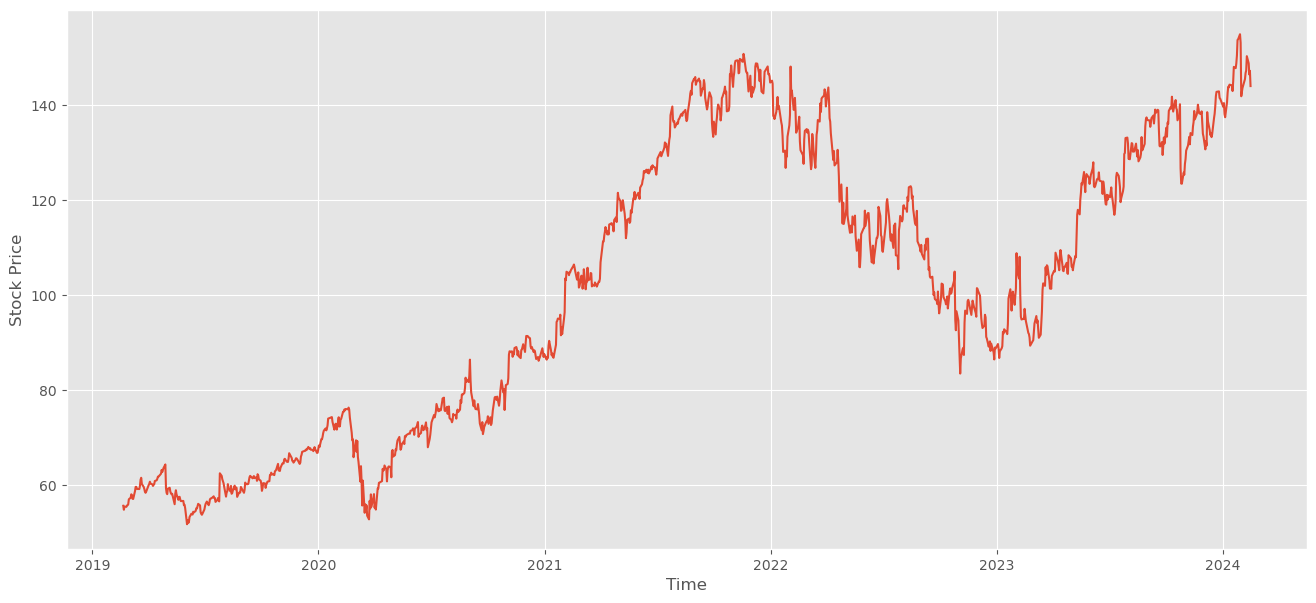

In [14]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel("Time")
ax1.set_ylabel("Stock Price in USD")
ax1.plot(goog)

In [17]:
rollingmean = goog.rolling(12).mean()
rollstd = goog.rolling(12).std()


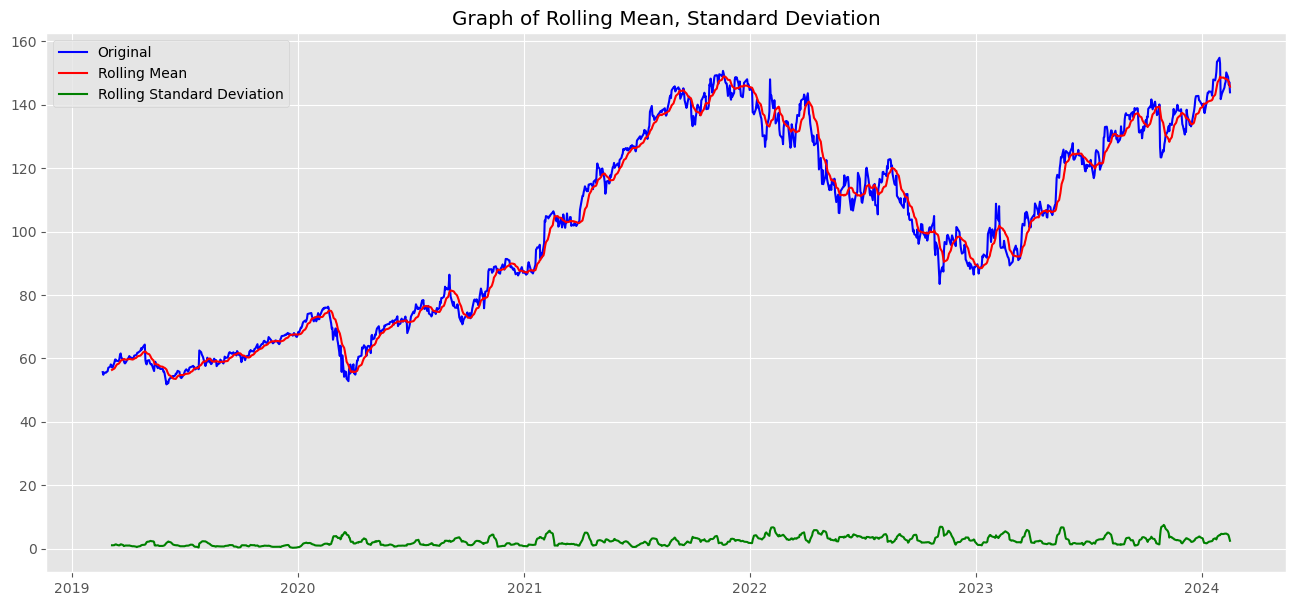

In [20]:
plt.figure(figsize=(16,7))
fig  = plt.figure(1)

original = plt.plot(goog, color = "blue", label = 'Original')
rollmean = plt.plot(rollingmean, color = "red", label = 'Rolling Mean')
std = plt.plot(rollstd, color = "green", label = 'Rolling Standard Deviation')
plt.legend(loc = 'best')
plt.title("Graph of Rolling Mean, Standard Deviation")
plt.show()





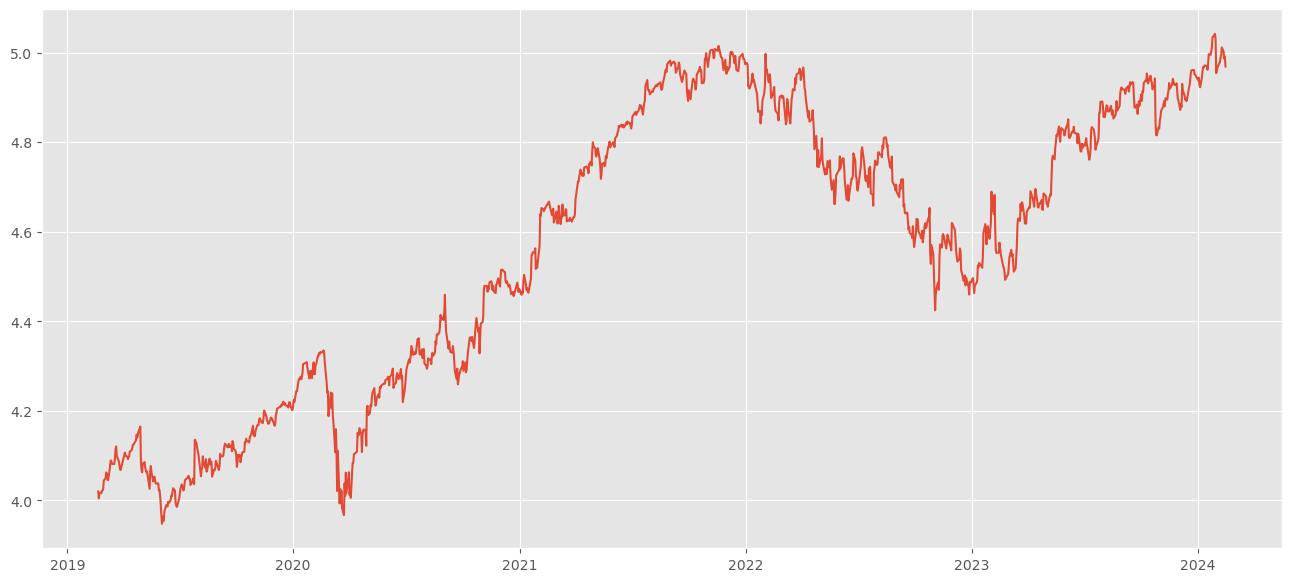

In [21]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(goog)
plt.plot(ts_log)